#### Workin

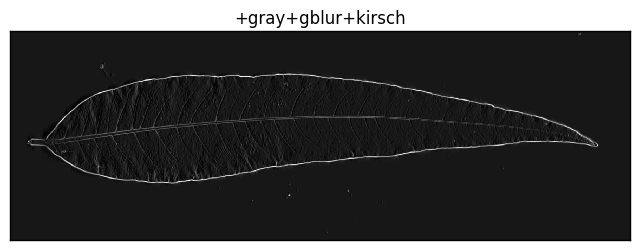

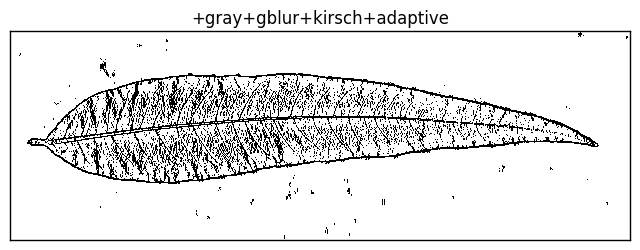

In [23]:
% matplotlib inline

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import hf
import filters

img_path = "D:\\projects\\leaf-vein-segmentation\\doc\\problem\\hojas\\ag1-ag10\\ag1.tif"
operation = ""

operation += "+gray"
gray = cv2.imread(img_path, 0)  # gray-scale loading
gray = gray.T
h, w = gray.shape
cv2.imwrite(img_path + operation + ".jpg", gray)

operation += "+gblur"
gray = cv2.GaussianBlur(gray, (5, 5) ,0)
# operation += "+median"
# gray = cv2.medianBlur(gray, 5)
# operation += "+blur"
# gray = cv2.blur(gray, (2, 2), borderType=cv2.BORDER_REPLICATE)
# operation += "+bilateral"
# window_size = (h>>3)
# gray = cv2.bilateralFilter(gray, window_size, 30, window_size)
cv2.imwrite(img_path + operation + ".jpg", gray)

# operation += "+sobel"
# gray = filters.sobel_filter(gray)
operation += "+kirsch"
gray = filters.kirsch_filter(gray)
# operation += "+laplacian"
# gray = cv2.Laplacian(gray, cv2.CV_64F)
# gray = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
cv2.imwrite(img_path + operation + ".jpg", gray)
plt.figure(figsize=(8, 8))
plt.title(operation), plt.xticks([]), plt.yticks([])
plt.imshow(gray, interpolation='none', cmap='gray')
plt.show()

# operation += "+otsu"
# _, gray_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
operation += "+adaptive"
window_size = (h>>2)
gray_bin = cv2.adaptiveThreshold(gray, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, window_size, 0)
# operation += "+adaptive.mean"
# window_size = (h>>2)
# gray_bin = cv2.adaptiveThreshold(gray, 255, cv2.THRESH_BINARY_INV, cv2.ADAPTIVE_THRESH_MEAN_C, window_size, 0)
cv2.imwrite(img_path + operation + ".jpg", gray_bin)
plt.figure(figsize=(8, 8))
plt.imshow(gray_bin, cmap = 'gray', interpolation='none')
plt.title(operation), plt.xticks([]), plt.yticks([])
plt.show()
